# Importing Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random

In [3]:
df = pd.read_csv(r'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

In [3]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [4]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [5]:
 df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [11]:
for i in list(df.columns):
    print(f'{i}:- {dict(df[i].value_counts())}')

Product:- {'KP281': 80, 'KP481': 60, 'KP781': 40}
Age:- {25: 25, 23: 18, 24: 12, 26: 12, 28: 9, 35: 8, 33: 8, 30: 7, 38: 7, 21: 7, 22: 7, 27: 7, 31: 6, 34: 6, 29: 6, 20: 5, 40: 5, 32: 4, 19: 4, 48: 2, 37: 2, 45: 2, 47: 2, 46: 1, 50: 1, 18: 1, 44: 1, 43: 1, 41: 1, 39: 1, 36: 1, 42: 1}
Gender:- {'Male': 104, 'Female': 76}
Education:- {16: 85, 14: 55, 18: 23, 15: 5, 13: 5, 12: 3, 21: 3, 20: 1}
MaritalStatus:- {'Partnered': 107, 'Single': 73}
Usage:- {3: 69, 4: 52, 2: 33, 5: 17, 6: 7, 7: 2}
Fitness:- {3: 97, 5: 31, 2: 26, 4: 24, 1: 2}
Income:- {45480: 14, 52302: 9, 46617: 8, 54576: 8, 53439: 8, 50028: 7, 51165: 7, 40932: 6, 48891: 5, 32973: 5, 35247: 5, 38658: 5, 34110: 5, 43206: 5, 57987: 4, 44343: 4, 36384: 4, 64809: 3, 90886: 3, 60261: 3, 92131: 3, 59124: 3, 88396: 2, 49801: 2, 83416: 2, 64741: 2, 61006: 2, 48556: 2, 31836: 2, 47754: 2, 89641: 2, 61398: 2, 56850: 2, 67083: 2, 42069: 2, 39795: 2, 37521: 2, 104581: 2, 99601: 1, 103336: 1, 85906: 1, 52290: 1, 77191: 1, 74701: 1, 95866: 1, 

In [12]:
for i in list(df.columns):
    print(f'{i}:- {list(df[i].unique())}')

Product:- ['KP281', 'KP481', 'KP781']
Age:- [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42]
Gender:- ['Male', 'Female']
Education:- [14, 15, 12, 13, 16, 18, 20, 21]
MaritalStatus:- ['Single', 'Partnered']
Usage:- [3, 2, 4, 5, 6, 7]
Fitness:- [4, 3, 2, 1, 5]
Income:- [29562, 31836, 30699, 32973, 35247, 37521, 36384, 38658, 40932, 34110, 39795, 42069, 44343, 45480, 46617, 48891, 53439, 43206, 52302, 51165, 50028, 54576, 68220, 55713, 60261, 67083, 56850, 59124, 61398, 57987, 64809, 47754, 65220, 62535, 48658, 54781, 48556, 58516, 53536, 61006, 57271, 52291, 49801, 62251, 64741, 70966, 75946, 74701, 69721, 83416, 88396, 90886, 92131, 77191, 52290, 85906, 103336, 99601, 89641, 95866, 104581, 95508]
Miles:- [112, 75, 66, 85, 47, 141, 103, 94, 113, 38, 188, 56, 132, 169, 64, 53, 106, 95, 212, 42, 127, 74, 170, 21, 120, 200, 140, 100, 80, 160, 180, 240, 150, 300, 280, 260, 360]


In [6]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [7]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [8]:
df['Usage'].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [9]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

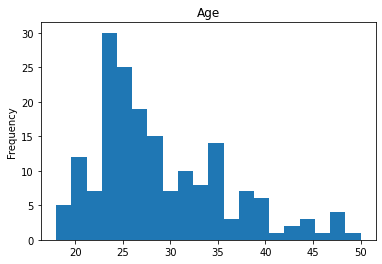

In [14]:
df['Age'].plot.hist(bins=20)
plt.title('Age')
plt.show()

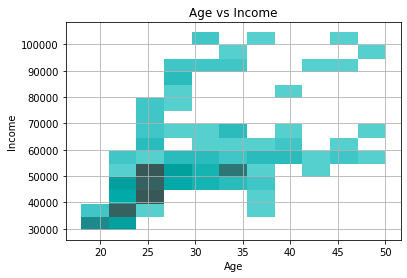

In [15]:
sns.histplot(data=df,x='Age',y='Income',color='aqua')
plt.title('Age vs Income')
plt.grid()
plt.show()

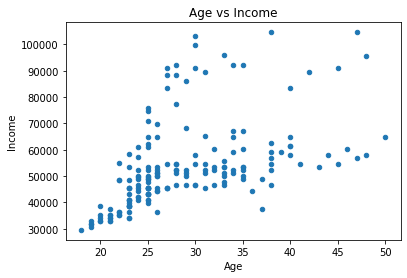

In [16]:
df.plot.scatter(x='Age',y='Income')
plt.title('Age vs Income')
plt.show()

<Figure size 1800x1800 with 0 Axes>

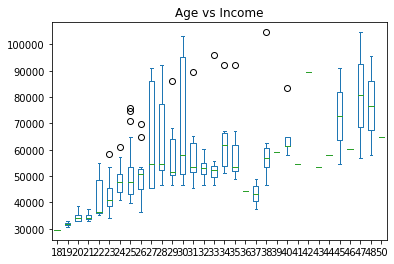

In [17]:
plt.figure(figsize=(25,25))
df.plot.box(by='Age',column='Income')
plt.title('Age vs Income') 
plt.show()

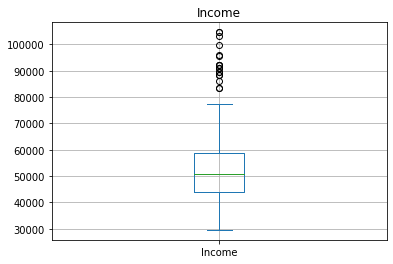

In [34]:
df['Income'].plot.box()
plt.grid()
plt.title('Income')
plt.show()

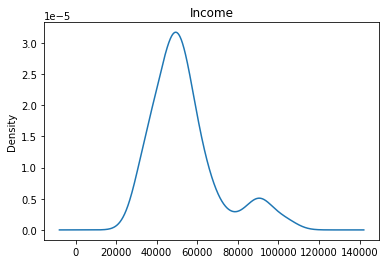

In [19]:
df['Income'].plot.density()
plt.title('Income')
plt.show()

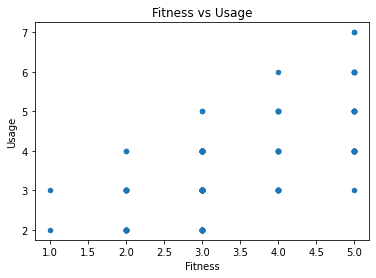

In [20]:
df.plot.scatter(x='Fitness',y='Usage')
plt.title('Fitness vs Usage')
plt.show()

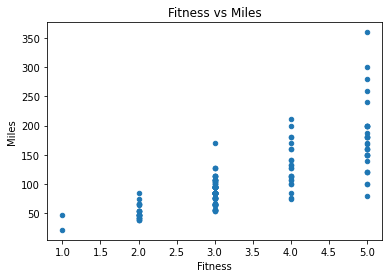

In [21]:
df.plot.scatter(x='Fitness',y='Miles')
plt.title('Fitness vs Miles')
plt.show()

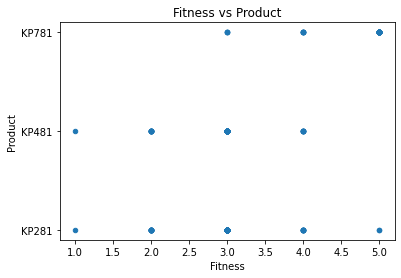

In [23]:
df.plot.scatter(x='Fitness',y='Product')
plt.title('Fitness vs Product')
plt.show()

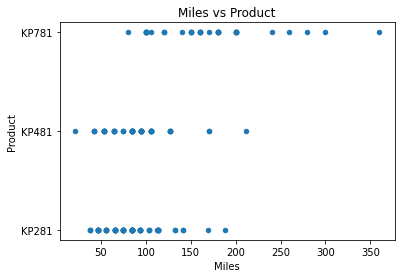

In [24]:
df.plot.scatter(x='Miles',y='Product')
plt.title('Miles vs Product')
plt.show()

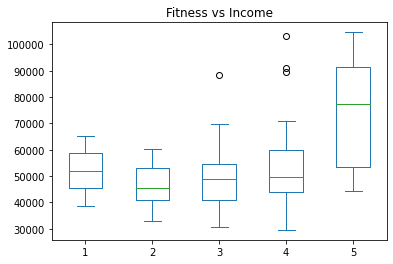

In [25]:
df.plot.box(by='Fitness',column='Income')
plt.title('Fitness vs Income')
plt.show()

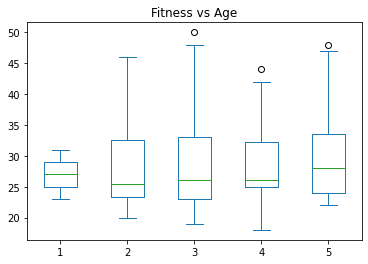

In [26]:
df.plot.box(by='Fitness',column='Age')
plt.title('Fitness vs Age')
plt.show()

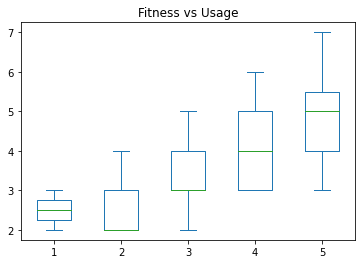

In [27]:
df.plot.box(by='Fitness',column='Usage')
plt.title('Fitness vs Usage')
plt.show()

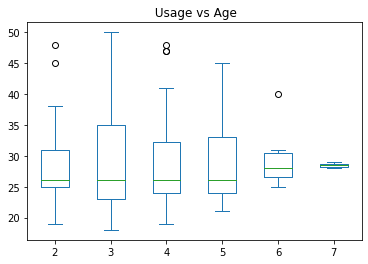

In [28]:
df.plot.box(by='Usage',column='Age')
plt.title(' Usage vs Age')
plt.show()

In [22]:
df['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

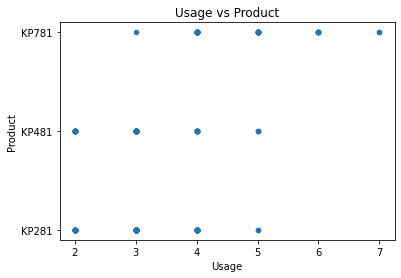

In [29]:
df.plot.scatter(x='Usage',y='Product')
plt.title('Usage vs Product')
plt.show()

In [24]:
#prob that single will buy

p = df[df['MaritalStatus'] == 'Partnered']['MaritalStatus'].count()
s = df[df['MaritalStatus'] == 'Single']['MaritalStatus'].count()

prob_p = ((p/df['MaritalStatus'].count())*100).round(2)
prob_s = ((s/df['MaritalStatus'].count())*100).round(2)

print(f'Probability that single person buy the Machine is {prob_s} \nProbability that Partnered person buy the Machine is {prob_p}')

Probability that single person buy the Machine is 40.56 
Probability that Partnered person buy the Machine is 59.44


In [25]:
#checkng which machine is bought by singles most

p_df = df[df['MaritalStatus'] == 'Single'][['Product','MaritalStatus']]
P1 = p_df[p_df['Product']=='KP281']['Product'].count()
P2 = p_df[p_df['Product']=='KP481']['Product'].count()
P3 = p_df[p_df['Product']=='KP781']['Product'].count()

prob_p1 = ((P1/(P1+P2+P3))*100).round(2)
prob_p2 = ((P2/(P1+P2+P3))*100).round(2)
prob_p3 = ((P3/(P1+P2+P3))*100).round(2)
print(f'Probability that Single person buy Machine KP281 is {prob_p1}\nProbability that Single person buy Machine KP481 is {prob_p2}\nProbability that Single person buy Machine KP781 is {prob_p3}')

Probability that Single person buy Machine KP281 is 43.84
Probability that Single person buy Machine KP481 is 32.88
Probability that Single person buy Machine KP781 is 23.29


In [26]:
#checkng which machine is bought by partnered most

p_df = df[df['MaritalStatus'] == 'Partnered'][['Product','MaritalStatus']]
P1 = p_df[p_df['Product']=='KP281']['Product'].count()
P2 = p_df[p_df['Product']=='KP481']['Product'].count()
P3 = p_df[p_df['Product']=='KP781']['Product'].count()

prob_p1 = ((P1/(P1+P2+P3))*100).round(2)
prob_p2 = ((P2/(P1+P2+P3))*100).round(2)
prob_p3 = ((P3/(P1+P2+P3))*100).round(2)
print(f'Probability that Partnered person buy Machine KP281 is {prob_p1}\nProbability that Partnered person buy Machine KP481 is {prob_p2}\nProbability that Partnered person buy Machine KP781 is {prob_p3}')

Probability that Partnered person buy Machine KP281 is 44.86
Probability that Partnered person buy Machine KP481 is 33.64
Probability that Partnered person buy Machine KP781 is 21.5


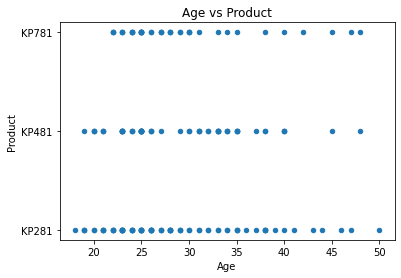

In [30]:
df.plot.scatter(x='Age',y='Product')
plt.title('Age vs Product')
plt.show()

In [28]:
#prob on Gender based


m = df[df['Gender'] == 'Male']['Gender'].count()
f = df[df['Gender'] == 'Female']['Gender'].count()

prob_m = ((m/df['Gender'].count())*100).round(2)
prob_f = ((f/df['Gender'].count())*100).round(2)

print(f'Probability that Female person buy the Machine is {prob_f} \nProbability that Male person buy the Machine is {prob_m}')

Probability that Female person buy the Machine is 42.22 
Probability that Male person buy the Machine is 57.78


In [29]:
#checkng which machine is bought by Males most

m_df = df[df['Gender'] == 'Male'][['Product','Gender']]
M1 = m_df[m_df['Product']=='KP281']['Product'].count()
M2 = m_df[m_df['Product']=='KP481']['Product'].count()
M3 = m_df[m_df['Product']=='KP781']['Product'].count()

prob_m1 = ((M1/(M1+M2+M3))*100).round(2)
prob_m2 = ((M2/(M1+M2+M3))*100).round(2)
prob_m3 = ((M3/(M1+M2+M3))*100).round(2)
print(f'Probability that Male person buy Machine KP281 is {prob_m1}\nProbability that Male person buy Machine KP481 is {prob_m2}\nProbability that Male person buy Machine KP781 is {prob_m3}')

Probability that Male person buy Machine KP281 is 38.46
Probability that Male person buy Machine KP481 is 29.81
Probability that Male person buy Machine KP781 is 31.73


In [30]:
#checkng which machine is bought by Males most

m_df = df[df['Gender'] == 'Female'][['Product','Gender']]
M1 = m_df[m_df['Product']=='KP281']['Product'].count()
M2 = m_df[m_df['Product']=='KP481']['Product'].count()
M3 = m_df[m_df['Product']=='KP781']['Product'].count()

prob_m1 = ((M1/(M1+M2+M3))*100).round(2)
prob_m2 = ((M2/(M1+M2+M3))*100).round(2)
prob_m3 = ((M3/(M1+M2+M3))*100).round(2)
print(f'Probability that Female person buy Machine KP281 is {prob_m1}\nProbability that Female person buy Machine KP481 is {prob_m2}\nProbability that Female person buy Machine KP781 is {prob_m3}')

Probability that Female person buy Machine KP281 is 52.63
Probability that Female person buy Machine KP481 is 38.16
Probability that Female person buy Machine KP781 is 9.21


In [65]:
#male and single / male and partnered
#female and single / female and partnered

ms = df[df['Gender'] == 'Male'][['Product','Gender','MaritalStatus']]
fs = df[df['Gender'] == 'Female'][['Product','Gender','MaritalStatus']]
mscount = ms[ms['MaritalStatus']=='Single']['Gender'].count()
fscount = fs[fs['MaritalStatus']=='Single']['Gender'].count()
print(f'Male and Single:- {mscount}\nFemale and single:- {fscount}')

mp = df[df['Gender'] == 'Male'][['Product','Gender','MaritalStatus']]
fp = df[df['Gender'] == 'Female'][['Product','Gender','MaritalStatus']]
mpcount = mp[mp['MaritalStatus']=='Partnered']['Gender'].count()
fpcount = fp[fp['MaritalStatus']=='Partnered']['Gender'].count()
print(f'Male and Partnered:- {mpcount}\nFemale and Partnered:- {fpcount}')
print()
print()

#Male and Single
k1 = ms[ms['MaritalStatus']=='Single']
msP1 = k1[k1['Product']=='KP281']['Product'].count()
msP2 = k1[k1['Product']=='KP481']['Product'].count()
msP3 = k1[k1['Product']=='KP781']['Product'].count()

total = msP1+msP2+msP3

msP1_prob = round((msP1/(total))*100,2)
msP2_prob = round((msP2/(total))*100,2)
msP3_prob = round((msP3/(total))*100,2)
print(f'Probability of Male who are Single buy product KP281:- {msP1_prob}%\nProbability of Male who are Single buy product KP481:- {msP2_prob}%\nProbability of Male who are Single buy product KP781:- {msP3_prob}%')
print()
print()

#Male and Partnered

k2 = mp[mp['MaritalStatus']=='Partnered']
mpP1 = k2[k2['Product']=='KP281']['Product'].count()
mpP2 = k2[k2['Product']=='KP481']['Product'].count()
mpP3 = k2[k2['Product']=='KP781']['Product'].count()

total = mpP1+mpP2+mpP3

mpP1_prob = round((mpP1/(total))*100,2)
mpP2_prob = round((mpP2/(total))*100,2)
mpP3_prob = round((mpP3/(total))*100,2)
print(f'Probability of Male who are Partnered buy product KP281:- {mpP1_prob}%\nProbability of Male who are Partnered buy product KP481:- {mpP2_prob}%\nProbability of Male who are Partnered buy product KP781:- {mpP3_prob}%')
print()
print()

#Female and Single

k3 = fs[fs['MaritalStatus']=='Single']
fsP1 = k3[k3['Product']=='KP281']['Product'].count()
fsP2 = k3[k3['Product']=='KP481']['Product'].count()
fsP3 = k3[k3['Product']=='KP781']['Product'].count()

total = fsP1+fsP2+fsP3

fsP1_prob = round((fsP1/(total))*100,2)
fsP2_prob = round((fsP2/(total))*100,2)
fsP3_prob = round((fsP3/(total))*100,2)
print(f'Probability of Female who are Single buy product KP281:- {fsP1_prob}%\nProbability of Female who are Single buy product KP481:- {fsP2_prob}%\nProbability of Female who are Single buy product KP781:- {fsP3_prob}%')
print()
print()

#Female and Partnered

k4 = fp[fp['MaritalStatus']=='Partnered']
fpP1 = k4[k4['Product']=='KP281']['Product'].count()
fpP2 = k4[k4['Product']=='KP481']['Product'].count()
fpP3 = k4[k4['Product']=='KP781']['Product'].count()

total = fpP1+fpP2+fpP3

fpP1_prob = round((fpP1/(total))*100,2)
fpP2_prob = round((fpP2/(total))*100,2)
fpP3_prob = round((fpP3/(total))*100,2)
print(f'Probability of Female who are Partnered buy product KP281:- {fpP1_prob}%\nProbability of Female who are Partnered buy product KP481:- {fpP2_prob}%\nProbability of Female who are Partnered buy product KP781:- {fpP3_prob}%')



Male and Single:- 43
Female and single:- 30
Male and Partnered:- 61
Female and Partnered:- 46


Probability of Male who are Single buy product KP281:- 44.19%
Probability of Male who are Single buy product KP481:- 23.26%
Probability of Male who are Single buy product KP781:- 32.56%


Probability of Male who are Partnered buy product KP281:- 34.43%
Probability of Male who are Partnered buy product KP481:- 34.43%
Probability of Male who are Partnered buy product KP781:- 31.15%


Probability of Female who are Single buy product KP281:- 43.33%
Probability of Female who are Single buy product KP481:- 46.67%
Probability of Female who are Single buy product KP781:- 10.0%


Probability of Female who are Partnered buy product KP281:- 58.7%
Probability of Female who are Partnered buy product KP481:- 32.61%
Probability of Female who are Partnered buy product KP781:- 8.7%


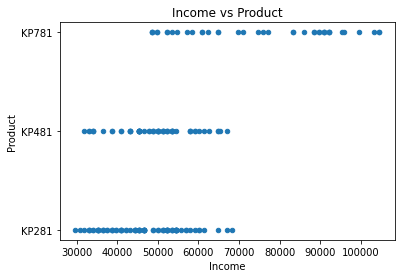

In [31]:
df.plot.scatter(x='Income',y='Product')
plt.title('Income vs Product')
plt.show()

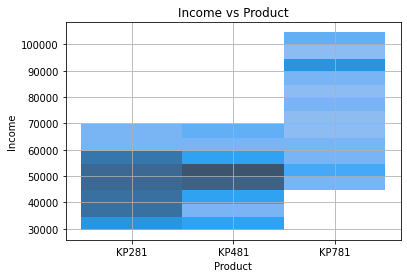

In [33]:
sns.histplot(data=df,x='Product',y='Income')
plt.title('Income vs Product')
plt.grid()
plt.show()